# **Assignment 1. Concrete Strength Regression**

This assignment require to perform a multiple variable fitting on a civil engineering dataset. In doing this assignment, you will learn to:

* Load data from a `csv` file using the `pandas` package
* Fit a multiple variable model using the `sklearn` package
* Evaluate the fit.

### **Step 1: load the packages you will need.**

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

### **Step 2: Download Data**

Concrete is one of the most basic construction materials.  In this exercise, you will download a simple dataset for predicting the strength of concrete from the attributes of concrete.  The data set comes from this very nice
[kaggle competition](https://www.kaggle.com/maajdl/yeh-concret-data).  Kaggle has many excellent dataset for your project.  
You can download the data with the following command.  After running this command, you should have the file `data.csv` in your local folder.

In [3]:
fn_src='https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/Concrete_Data_Yeh.csv'
fn_dst='data.csv'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File data.csv downloaded


The `pandas` package has excellent methods for loading `csv` files.  The following command loads the `csv` file into a dataframe `df`.

In [4]:
df = pd.read_csv('data.csv')

Ues the `df.head()` to print the first few rows of the dataframe.

In [5]:
print(len(df))
df.head(20)

1030


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


### **Step 3: Exploring the data.**

In [6]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Step3: Create the list of attribute names**

In this exercise, the target variable will be the concrete strength in Megapascals, `csMPa`.  We will use the other 8 attributes as predictors to predict the strength.  

Create a list called `xnames` of the 8 names of the predictors.  You can do this as follows:
* Get the list of names of the columns from `df.columns.tolist()`.  
* Remove the last items from the list using indexing.

Print the `xnames`.

In [7]:
names=df.columns.tolist()
print(names)
xnames=names[0:8]
print(xnames)

['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']
['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']


**Step 4. Get the data matrix `X` and target vector `y` from the dataframe `df`.**  

Recall that to get the items from a dataframe, you can use syntax such as

    X = df.iloc[:,:-1]  
        
which gets the data of last column `csMPa` and puts it into an array `y`.  You can also do that with syntax like

    y = df.iloc[:,-1]  


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape)
print(y.shape)
X

(1030, 8)
(1030,)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


**Step 5.Split the Data into Training and Test**

Split the data into training and test.  Use 30% for test and 70% for training.
You can do that by using numpy array like the demo.
You also can do the splitting manually or use the `sklearn` package `train_test_split`.   Store the training data in `Xtr,ytr` and test data in `Xts,yts`.


In [9]:
from sklearn.model_selection import train_test_split

# TODO
#  Xtr,Xts,ytr,yts = train_test_split(...)

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=42)

print("Xtr shape:", Xtr.shape)
print("ytr shape:", ytr.shape)
print("Xts shape:", Xts.shape)
print("yts shape:", yts.shape)

Xtr shape: (721, 8)
ytr shape: (721,)
Xts shape: (309, 8)
yts shape: (309,)


**Step 6. Fit a Linear Model**

Create a linear regression model object `reg` and fit the model on the training data.


In [10]:
# TODO
#   reg = ...
#   reg.fit(...)

reg = linear_model.LinearRegression()
reg.fit(Xtr, ytr)

LinearRegression()

**Step 7. Compute the predicted values `yhat_tr` on the training data and print the `R^2` value on the training data.**

In [18]:
# TODO
#    yhat_tr = ...
#    rsq_tr = ...
yhat_tr = reg.predict(Xtr)
RSS_tr = np.mean((yhat_tr-ytr)**2/(np.std(ytr))**2)
rsq_tr = 1-RSS_tr

print("R^2 value on the training data:", rsq_tr)

R^2 value on the training data: 0.6196723710532992


**Step 8. Compute the predicted values `yhat_val` on the validation data and print the `R^2` value on the validation data.**

In [19]:
# TODO
#    yhat_val = ...
#    rsq_val = ...

yhat_val = reg.predict(Xts)
RSS_ts = np.mean((yhat_val-yts)**2/(np.std(yts))**2)
rsq_val = 1-RSS_ts

print("R^2 value on the validation data.", rsq_val)

R^2 value on the validation data. 0.5943782479239206


**Step 9. Create a scatter plot of the actual vs. predicted values of `y` on the validation data.**

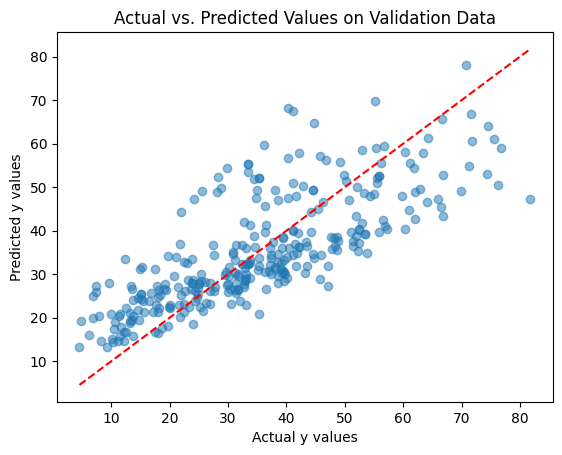

In [15]:
# TODO
plt.scatter(yts, yhat_val, alpha=0.5)
plt.xlabel("Actual y values")
plt.ylabel("Predicted y values")
plt.title("Actual vs. Predicted Values on Validation Data")
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], color="red", linestyle="--")
plt.show()